In [1]:
#SETUP
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars.

a. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.


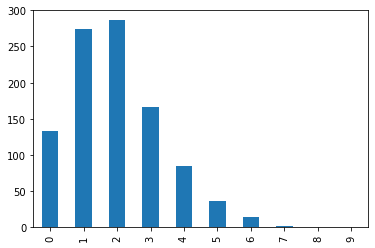

In [2]:
avg_cars_waiting = 2

pd.Series(stats.poisson(avg_cars_waiting).rvs(1000)).value_counts().sort_index().plot(kind='bar') # Poisson distribution
plt.show() # plot


In [3]:
# b. What is the probability that no cars drive up in the noon hour?

no_cars_noon = round(stats.poisson(avg_cars_waiting).pmf(0), 3) # probability of no cars
print(f'The probability that there will be no cars at noon iss {no_cars_noon * 100}%')

The probability that there will be no cars at noon iss 13.5%


In [4]:
# c. What is the probability that 3 or more cars come through the drive through?

three_or_more_cars = round(stats.poisson(avg_cars_waiting).sf(2), 2) # probability of 3 or more cars
print(f'The probability that there will be 3 or more cars at noon iss {three_or_more_cars * 100}%')

The probability that there will be 3 or more cars at noon iss 32.0%


In [5]:
# d. How likely is it that the drive through gets at least 1 car?

one_car = round(stats.poisson(avg_cars_waiting).cdf(1), 2) # probability of 1 or more cars
print(f'The probability that there will be at least 1 car at noon iss {one_car * 100}%')

The probability that there will be at least 1 car at noon iss 41.0%


In [6]:
# 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. 
# Calculate the following:
# a. What grade point average is required to be in the top 5% of the graduating class?

SU_grad_mean = 3 # mean
SU_grad_std = .3 # standard deviation

gpa_top_five_percent = round(stats.norm(SU_grad_mean, SU_grad_std).ppf(1 - .05), 2) # grade point average required to be in the top 5% of the graduating class
print(f'The minimum GPA required to be in the top 5% of the graduating class is {gpa_top_five_percent}')

The minimum GPA required to be in the top 5% of the graduating class is 3.49


In [7]:
#simulation check

check_2a = (np.random.normal(3, .3, 100_000) > 3.49).mean() # probability of getting a grade point average greater than 3.49
print(f'The simulation shows a gpa greater than 3.49 is in the top {check_2a * 100}%')

The simulation shows a gpa greater than 3.49 is in the top 5.13%


In [8]:
# b. What GPA constitutes the bottom 15% of the class?

gpa_bottom_fifteen_percent = round(stats.norm(SU_grad_mean, SU_grad_std).ppf(.15), 2) # grade point average required to be in the bottom 15% of the graduating class
print(f'Anything below a {gpa_bottom_fifteen_percent} GPA is considered bottom 15% of the class')


Anything below a 2.69 GPA is considered bottom 15% of the class


In [9]:
#simulation check

check_2b = (np.random.normal(3, .3, 100_000) < 2.69).mean() # probability of getting a grade point average less than 2.69
print(f'The simulation shows a gpa less than 2.69 is in the bottom {check_2b * 100}%')

The simulation shows a gpa less than 2.69 is in the bottom 15.03%


In [10]:
# c. An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class.
# Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

top_third_decile_range = round(stats.norm(SU_grad_mean, SU_grad_std).ppf(.3), 3) # grade point average required to be in the top 15% of the graduating class
bottom_third_decile_range = round(stats.norm(SU_grad_mean, SU_grad_std).ppf(.2), 3) # grade point average required to be in the bottom 15% of the graduating class

print(f'The range of the third decile is between {bottom_third_decile_range} to {top_third_decile_range}.') # range of the third decile
print("A student with a 2.8 GPA would qualify for this scholarship")

The range of the third decile is between 2.748 to 2.843.
A student with a 2.8 GPA would qualify for this scholarship


In [11]:
# d. If I have a GPA of 3.5, what percentile am I in?

gpa_three_point_five = round(stats.norm(SU_grad_mean, SU_grad_std).cdf(3.5), 2) # probability of getting a grade point average greater than 3.49
print(f'If I have a GPA of 3.5, I am in the {gpa_three_point_five * 100} percentile.')

If I have a GPA of 3.5, I am in the 95.0 percentile.


In [12]:
# 3. A marketing website has an average click-through rate of 2%. 
# One day they observe 4326 visitors and 97 click-throughs. 
# How likely is it that this many people or more click through?

avg_click_through_rate = .02 # chance of click through
visitors = 4326 # trials
click_throughs = 97 

click_through_probability = round(stats.binom(visitors, avg_click_through_rate).sf(click_throughs), 2) # probability of click through
print(f'The probability that {click_throughs} or more people will click through is {click_through_probability * 100}%.')

The probability that 97 or more people will click through is 12.0%.


In [13]:
# Check utilizing simulation

check_3 = (np.random.binomial(visitors, avg_click_through_rate, 100_000) > 97).mean() # probability of getting a grade point average greater than 3.49
print(f'The simulation shows that {check_3 * 100}% of the people who visited the site clicked through.')

The simulation shows that 11.777% of the people who visited the site clicked through.


In [14]:
# 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place.
# Looking to save time, you put down random probabilities as the answer to each question.
# a. What is the probability that at least one of your first 60 answers is correct?

answers = 60 # Represent the first 60 answers
prob = .01 # Represent the probability of getting a correct answer

correct_answers = round(stats.binom(answers, prob).sf(0), 2) # probability of getting a correct answer
print(f'The probability that at least one of your first 60 answers is correct is approximatly {correct_answers * 100}%.')

The probability that at least one of your first 60 answers is correct is approximatly 45.0%.


In [15]:
# Check utilizing simulation random.choice

check_4 = np.random.choice([0, 1], size=(100_000,60), p=[1 - prob, prob])
check_4 = (check_4.mean(axis=1) > 0).mean() # probability of getting a correct answer
print(f'The simulation shows that {check_4 * 100}% of the people who guessed within the first 60 question got atleast 1 correct.')

The simulation shows that 45.106% of the people who guessed within the first 60 question got atleast 1 correct.


In [16]:
# The codeup staff tends to get upset when the student break area is not cleaned up.
# Suppose that there's a 3% chance that any one student cleans the break area when they visit it, 
# and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area.
# How likely is it that the break area gets cleaned up each day?

total_students = 22*3 # Represent the total number of students
chance_of_visit = round(.9 * total_students) # Represent the number of students who visit the break area
chance_of_clean = .03 # Represent the chance of cleaning the break area

is_cleaned = stats.binom(chance_of_visit, chance_of_clean).sf(0) # probability of getting a correct answer
print(f'There is an {is_cleaned * 100}% chance that the break area will be cleaned today.')

There is an 83.42199288437352% chance that the break area will be cleaned today.


In [17]:
# Check utilizing simulation

check_5 = (np.random.choice([0, 1], size=(100_000, chance_of_visit), p=[1 - chance_of_clean, chance_of_clean])) 
check_5 = (check_5.mean(axis=1) > 0).mean() # probability of getting a correct answer
print(f'Out of 100,000 simulations the data shows that {check_5 * 100}% of the people who visited the break area cleaned it.')


Out of 100,000 simulations the data shows that 83.473% of the people who visited the break area cleaned it.


In [18]:
# How likely is it that it goes two days without getting cleaned up?

chance_of_visit_2days = chance_of_visit * 2 # Represent the number of students who visit the break area in two days
not_cleaned_2days = round(stats.binom(chance_of_visit_2days, chance_of_clean).pmf(0), 3) # Represent the chance of the break area not being cleaned
print(f'There is an {not_cleaned_2days * 100}% chance that the break area will not be cleaned two days in a row.')

There is an 2.7% chance that the break area will not be cleaned two days in a row.


In [19]:
# Check utilizing simulation

check_5a = (np.random.choice([0, 1], size=(100_000, chance_of_visit_2days), p=[1 - chance_of_clean, chance_of_clean]))
check_5a = (check_5a.mean(axis=1) == 0).mean()
print(f'Out of 100,000 simulations the data shows that {check_5a * 100}% of the people who visited the break area cleaned it.')

Out of 100,000 simulations the data shows that 2.6630000000000003% of the people who visited the break area cleaned it.


In [20]:
# All week?

chance_of_visit_week = chance_of_visit * 5 # Represent the number of students who visit the break area all week
not_cleaned_week = stats.binom(chance_of_visit_week, chance_of_clean).pmf(0) # Represent the chance of the break area not being cleaned
print(f'There is an {not_cleaned_week * 100}% chance that the break area will not be cleaned all week.')


There is an 0.012521651388091245% chance that the break area will not be cleaned all week.


In [21]:
# Check utilizing simulation

check_5b = (np.random.choice([0, 1], size=(100_000, chance_of_visit_week), p=[1 - chance_of_clean, chance_of_clean]))
check_5b = (check_5b.mean(axis=1) == 0).mean()
print(f'Out of 100,000 simulations the data shows that {check_5b * 100}% of the people who visited the break area cleaned it.')

Out of 100,000 simulations the data shows that 0.011000000000000001% of the people who visited the break area cleaned it.


In [22]:
# 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 
# After several weeks of careful observation, 
# you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3.
# If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, 
# what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? 
# Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

avg_num_people_in_line = 15 # Represent the average number of people in line
std_num_people_in_line = 3 # Represent the standard deviation of the number of people in line
time_to_order = 2 # Represent the time it takes to order
time_for_food_after_order = 10 # Represent the time it takes to get your food

avg_time_to_place_order = avg_num_people_in_line * time_to_order # Represent the average time to place an order
std_time_to_place_order = std_num_people_in_line * time_to_order # Represent the standard deviation of the time to place an order

time_left_to_eat = 60 - avg_num_people_in_line - time_for_food_after_order # Represent the time left to eat.

atleast_15min_to_eat = round(stats.norm(avg_time_to_place_order, std_time_to_place_order).cdf(time_left_to_eat), 4) # Represent the probability of the time left to eat being less than 15 minutes
print(f'The probability that you have at least 15 minutes left to eat your food before you have to go back to class is {atleast_15min_to_eat * 100}%.')


The probability that you have at least 15 minutes left to eat your food before you have to go back to class is 79.77%.


In [23]:
# Check utilizing simulation

check_6 = (np.random.normal(avg_time_to_place_order, std_time_to_place_order, 100_000) < time_left_to_eat).mean() 
print(f'Out of 100,000 simulations the data shows that {check_6 * 100}% of the people who ordered their food had at least 15 minutes left to eat.')


Out of 100,000 simulations the data shows that 79.72399999999999% of the people who ordered their food had at least 15 minutes left to eat.


In [24]:
# 7. Connect to the employees database and find the average salary of current employees, 
# along with the standard deviation. 

from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees' # Represent the url to connect to the employees database
query = '''
            SELECT * 
            FROM employees
            JOIN salaries 
            USING (emp_no)
            WHERE to_date >= NOW()
            ''' # Represent the query to find the average salary of current employees
emp_db = pd.read_sql(query, url) # Represent the dataframe of the current employees

avg_pay = emp_db['salary'].mean() # Represent the average salary of current employees
std_pay = emp_db['salary'].std() # Represent the standard deviation of the salary of current employees
 

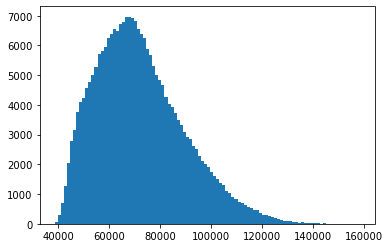

In [38]:
# For the following questions, 
# calculate the answer based on modeling the employees salaries with a normal distribution
# defined by the calculated mean and standard deviation then compare this answer to the 
# actual values present in the salaries dataset.

# Employees salaries with a normal distribution
norm_salary_dist = stats.norm(avg_pay, std_pay) 
# plot only the distribution of the salaries
plt7 = plt.hist(emp_db['salary'], bins=100) 
plt.show(plt7)

In [42]:
# a. What percent of employees earn less than 60,000?

percent_less_than_60k = round(norm_salary_dist.cdf(60000), 4)   # Represent the probability of the salary being less than $60,000
print(f'{percent_less_than_60k * 100}% of employees earn less than $60,000.')

24.39% of employees earn less than $60,000.


In [44]:
# Check utilizing simulation

check_7a = (np.random.normal(avg_pay, std_pay, 100_000) < 60000).mean() # Represent the probability of earning less than $60,000
print(f'Out of 100,000 simulations the data shows that {check_7a * 100}% of the employees earn less than $60,000.')

Out of 100,000 simulations the data shows that 24.546% of the employees earn less than $60,000.


In [47]:
# b. What percent of employees earn more than 95,000?

percent_more_than_95k = round(norm_salary_dist.sf(95000), 4) # Represent the probability of the salary being more than 95,000
print(f'{percent_more_than_95k * 100}% of employees earn more than $95,000.')

9.21% of employees earn more than $95,000.


In [48]:
# What percent of employees earn between 65,000 and 80,000?

percent_between_65k_80k = round(norm_salary_dist.cdf(80000) - norm_salary_dist.cdf(65000), 4)   # Represent the probability of the salary being between $65,000 and $80,000
print(f'{percent_between_65k_80k * 100}% of employees earn between $65,000 and $80,000.')

33.51% of employees earn between $65,000 and $80,000.


In [49]:
# What do the top 5% of employees make?

top_5_percent = round(norm_salary_dist.ppf(0.95), 0) # Represent the top 5% of employees
print(f'The top 5% of employees make {top_5_percent}.')

The top 5% of employees make 100485.0.
